In [1]:
%pylab inline
import sys
sys.path = ['D:\Coding\py\py3\experiments\easyEEG2\\']+sys.path 
# import importlib
# importlib.reload(easyEEG)

import easyEEG
# easyEEG.reload()

# import os
import mne

# mne.set_log_level('ERROR')

path=r'D:\lab\6_char_chunking\\'
subjIDs = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,18,19,20,21,22,23]
files = [f'{file}.vhdr' for file in ['05','06', '07','08','09','10','11', '12','13',
                            '14','15','16','17','18','18_2','19','20','21','22','23']]

raw_all = easyEEG.io.load_raw(path=path, files=files, subjIDs=subjIDs).\
                preprocess(filter_range=(0.5,30), DeWave=True, deEOG='regress',EOG_chs=['TP10','FT10','Fp1','TP9'], drop_channels=['TP10','FT10','TP9'],raw_reference='Cz', new_reference='average')
# path=r'D:\lab\6_char_chunking\0.5dewave_1\\'
# raw_all = easyEEG.io.load_raw(path=path, preload=True)
raw_all.subjIDs[13:15] = [18]
raw_all.ALL_EEG[13:15] = [mne.concatenate_raws(raw_all[13:15])]

events={'Tt':'Tt', 'Tf':'Tf', 'Ft':'Ft', 'Ff':'Ff'}
epochs = raw_all.epoching(events=events, epoch_range=(-0.2, 1))

Populating the interactive namespace from numpy and matplotlib
EasyEEG (V0.10.0.0) loaded. 
Reading D:\lab\6_char_chunking\\/05.vhdr
Extracting parameters from D:\lab\6_char_chunking\\/05.vhdr...
Setting channel info structure...
Reading D:\lab\6_char_chunking\\/06.vhdr
Extracting parameters from D:\lab\6_char_chunking\\/06.vhdr...
Setting channel info structure...
Reading D:\lab\6_char_chunking\\/07.vhdr
Extracting parameters from D:\lab\6_char_chunking\\/07.vhdr...
Setting channel info structure...
Reading D:\lab\6_char_chunking\\/08.vhdr
Extracting parameters from D:\lab\6_char_chunking\\/08.vhdr...
Setting channel info structure...
Reading D:\lab\6_char_chunking\\/09.vhdr
Extracting parameters from D:\lab\6_char_chunking\\/09.vhdr...
Setting channel info structure...
Reading D:\lab\6_char_chunking\\/10.vhdr
Extracting parameters from D:\lab\6_char_chunking\\/10.vhdr...
Setting channel info structure...
Reading D:\lab\6_char_chunking\\/11.vhdr
Extracting parameters from D:\lab\6_cha

## ERP

Cz


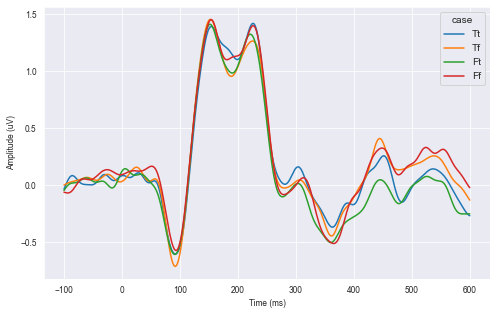

Fz


<Figure size 432x288 with 0 Axes>

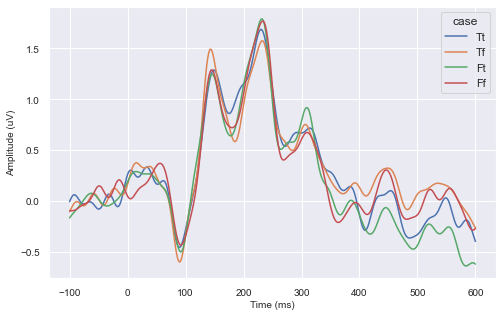

Pz


<Figure size 432x288 with 0 Axes>

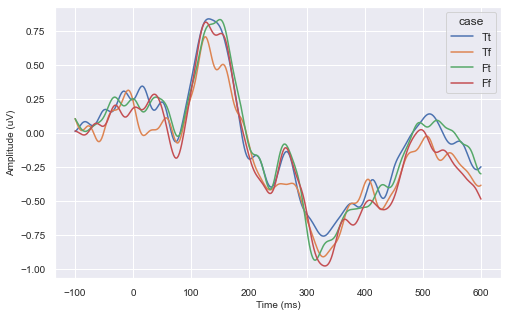

<Figure size 432x288 with 0 Axes>

In [16]:
easyEEG.reload()
for ch in ['Cz','Fz','Pz']:
    print(ch)
    script = {'condition': 'Tt,Tf,Ft,Ff',
              'channel': ch,
              'time': '-100~600',}

    res = epochs.extract(script).ERP()
    res.plot(dict(ci=None))

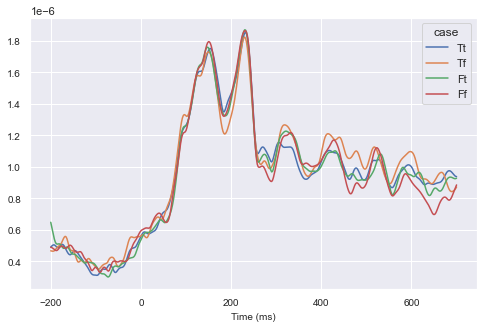

<Figure size 432x288 with 0 Axes>

In [79]:
easyEEG.reload()
script = {'condition': 'Tt,Tf,Ft,Ff',
          'time': '-200~700',}
# np.sqrt(np.mean(x**2))
res = epochs.extract(script).RMS()
res.plot(dict(ci=None))

# script = {'condition': 'Tt-Ff,Ft-Ff,Tf-Ff',
#           'time': '-200~700',}
# # np.sqrt(np.mean(x**2))
# res = epochs.extract(script).RMS()
# res.plot(dict(ci=None))

# script = {'condition': 'Tt-Ft,Tt-Tf',
#           'time': '-200~700',}
# # np.sqrt(np.mean(x**2))
# res = epochs.extract(script).RMS()
# res.plot(dict(ci=None))

## clustering

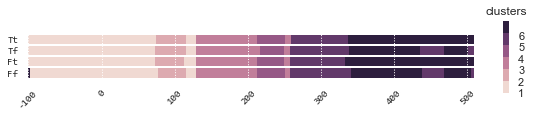

<Figure size 432x288 with 0 Axes>

In [331]:
easyEEG.reload()
script = {'condition': f'Tt,Tf,Ft,Ff',
          'time': '-100~500'}
clu = epochs.extract(script).clustering(6)
clu.plot()

## topography

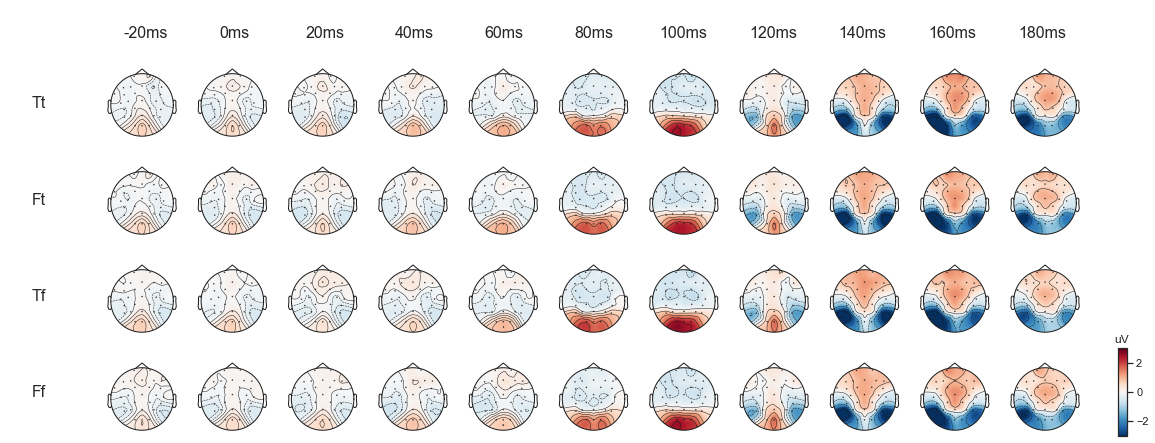

<Figure size 432x288 with 0 Axes>

In [33]:
easyEEG.reload()
script = {'condition': 'Tt,Ft,Tf,Ff',
          'time': '0~200',}

res = epochs.extract(script).topography(win_size='20ms')
res.plot(dict(zlim=[-3,3]))

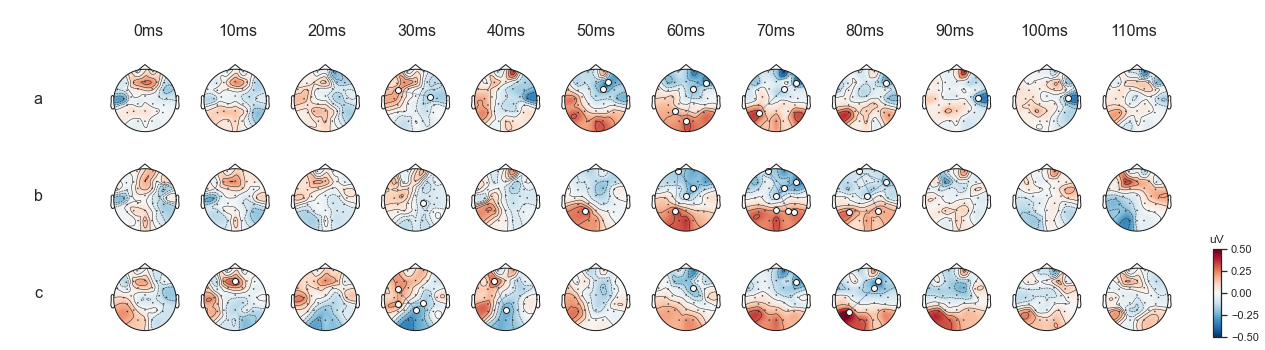

<Figure size 432x288 with 0 Axes>

In [321]:
easyEEG.reload()
script = {'condition': 'a:Tt&Ff,b:Ft&Ff,c:Tf&Ff',
          'time': '0~120',}

res = epochs.extract(script).topography(win_size='10ms').compare2()
res.plot(dict(zlim=(-.5,.5)))

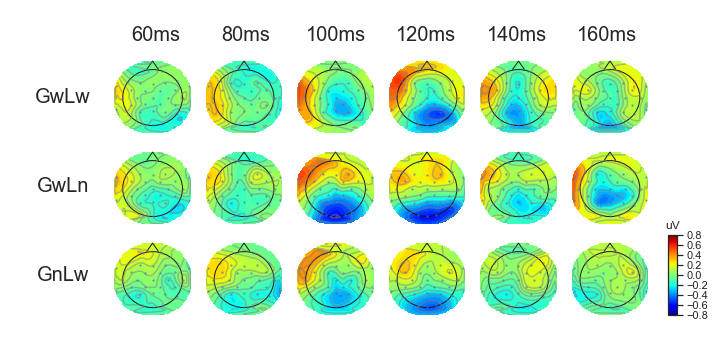

<Figure size 432x288 with 0 Axes>

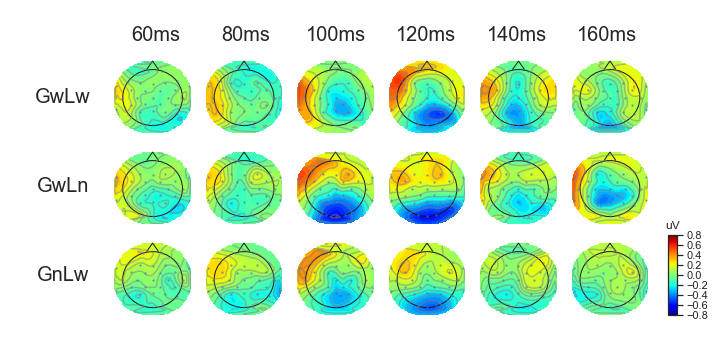

<Figure size 432x288 with 0 Axes>

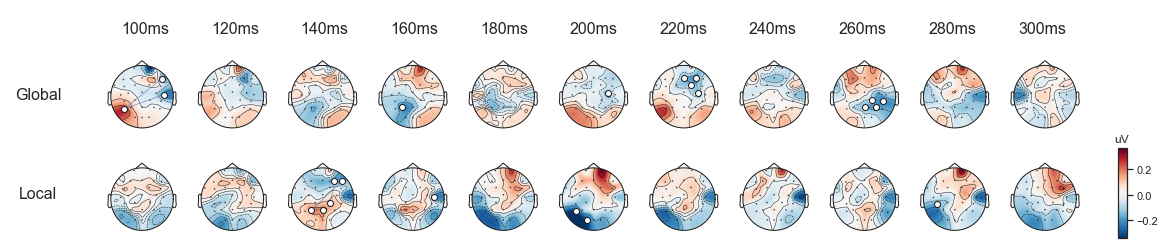

<Figure size 432x288 with 0 Axes>

In [345]:
easyEEG.reload()
script = {'condition': 'Global:Tt+Tf&Ft+Ff,Local:Tt+Ft&Tf+Ff',
          'time': '100~320',}

res = epochs.extract(script).topography(win_size='20ms').compare2()
res.plot()

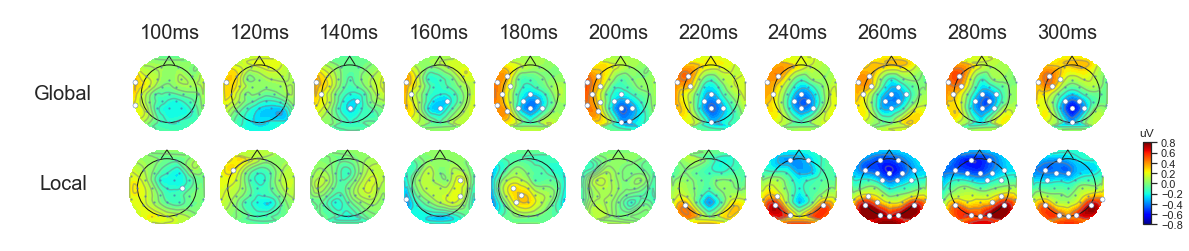

<Figure size 432x288 with 0 Axes>

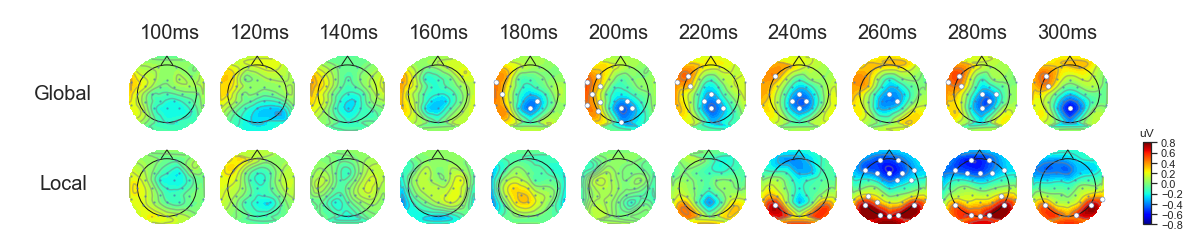

<Figure size 432x288 with 0 Axes>

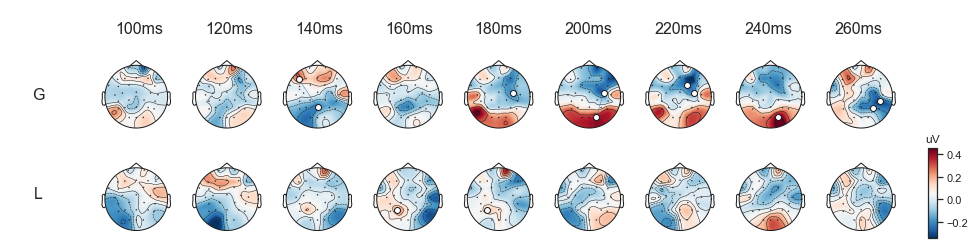

<Figure size 432x288 with 0 Axes>

In [329]:
easyEEG.reload()
script = {'condition': 'G:Tf&Ff,L:Ft&Ff',
          'time': '100~280',}

res = epochs.extract(script).topography(win_size='20ms').compare2()
res.plot()

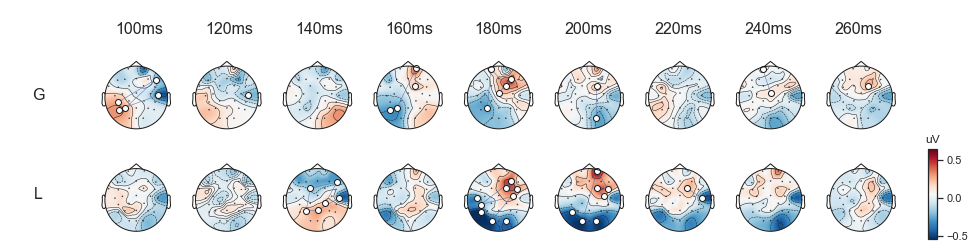

<Figure size 432x288 with 0 Axes>

In [330]:
easyEEG.reload()
script = {'condition': 'G:Tt&Ft,L:Tt&Tf',
          'time': '100~280',}

res = epochs.extract(script).topography(win_size='20ms').compare2()
res.plot()

## cosine distance

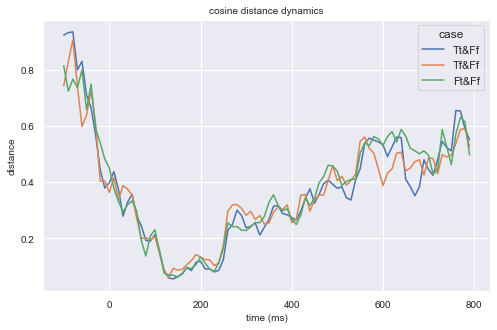

<Figure size 432x288 with 0 Axes>

In [87]:
easyEEG.reload()
script = {'condition': 'Tt&Ff,Tf&Ff,Ft&Ff',
          'time': '-100~800',}

res = epochs.extract(script).cosine_distance_dynamics(win_size='10ms')
res.plot()

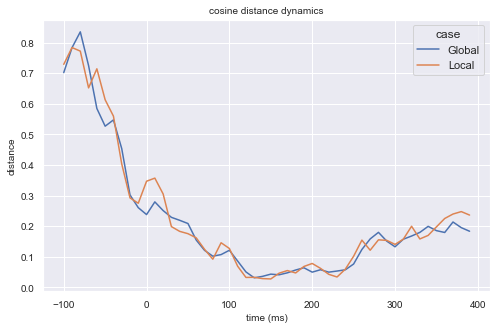

<Figure size 432x288 with 0 Axes>

In [90]:
easyEEG.reload()
script = {'condition': 'Global:Tt+Tf&Ft+Ff,Local:Tt+Ft&Tf+Ff',
          'time': '-100~400',}

res = epochs.extract(script).cosine_distance_dynamics(win_size='10ms')
res.plot()